In [10]:
# special call that tells notebook to show matlplotlib figures inline
%matplotlib inline
import matplotlib.pyplot as plt  # standard Python plotting library
import numpy as np  # fundamental package for scientific computing, handles arrays and math
# import the tdt library
import tdt
from tdt import read_block, read_sev, epoc_filter, download_demo_data

In [11]:
#store the path for all the tank folder
#take 7 new data tank folders as examples
BLOCK_PATH1 = 'new_data/Algernon-200625-150526'
BLOCK_PATH2 = 'new_data/Algernon-200625-154539'
BLOCK_PATH3 = 'new_data/Algernon-200625-162128'
BLOCK_PATH4 = 'new_data/Algernon-200625-165959'
BLOCK_PATH5 = 'new_data/Algernon-200810-151843'
BLOCK_PATH6 = 'new_data/Algernon-200810-151923'
BLOCK_PATH7 = 'new_data/Algernon-200810-160610'


In [14]:
#read_block is an all-in-one function for reading TDT data into Python. It needs only one input: the block path.
data1 = tdt.read_block(BLOCK_PATH1)
data2 = tdt.read_block(BLOCK_PATH2)
data3 = tdt.read_block(BLOCK_PATH3)
data4 = tdt.read_block(BLOCK_PATH4)
data5 = tdt.read_block(BLOCK_PATH5)
data6 = tdt.read_block(BLOCK_PATH6)
data7 = tdt.read_block(BLOCK_PATH7)




read from t=0s to t=1849.32s
read from t=0s to t=10.69s


### check the data stream store type

In [15]:
#to check the data tank's wave types
print('Sampling rates in', data1.info.blockname)
#for loop to check the stream data type key names
for store in data1.streams.keys():
    print(store)

Sampling rates in Algernon-200625-150526
_405A
_465A
_405B
_465B
Fi1d
Fi1r


### Algernon-200625-150526 - A -white noise

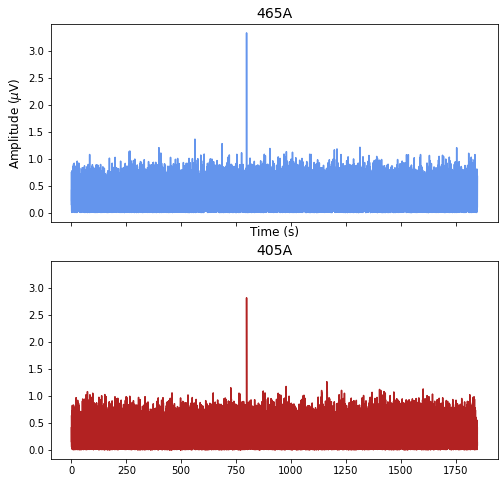

In [28]:
#Let's create time vectors for each stream store for plotting in time.
data1_time__465A = np.linspace(1, len(data1.streams._465A.data), len(data1.streams._465A.data)) / data1.streams._465A.fs
data1_time__405A = np.linspace(1, len(data1.streams._405A.data), len(data1.streams._405A.data)) / data1.streams._405A.fs
#plot the figure
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), sharex=True,sharey=True)
#first figure for 465A
ax1.plot(data1_time__465A, data1.streams._465A.data, color='cornflowerblue')
ax1.set_title('465A', fontsize=14)
#second figure for 405A
ax2.plot(data1_time__405A, data1.streams._405A.data, color='firebrick')
ax2.set_title('405A', fontsize=14)

#set axis names
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Amplitude ($\mu$V)', fontsize=12)

#plt.axis([0,2300,300,550])
plt.show()

### signal A DeltaF plot

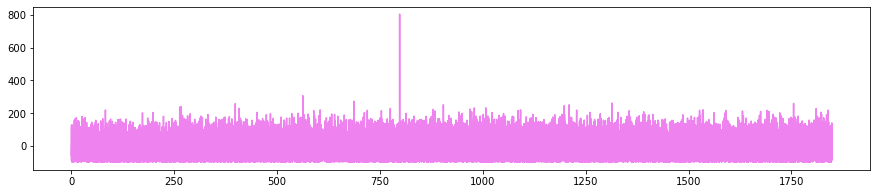

In [18]:
#Fitting 405A channel onto 465A channel to detrend signal
#Scale and fit data. Algorithm sourced from Tom Davidson 
x1= np.array(data1.streams._405A.data)
y1= np.array(data1.streams._465A.data)
bls = np.polyfit(x1, y1, 1)
fit_line = np.multiply(bls[0], x1) + bls[1]

#caculate the deltaF
x=(np.array(y1-fit_line)/np.array(fit_line))
#code for plotting
plt.figure(figsize=(15,3))
plt.plot(np.array(data1_time__465A), np.array(x*100),color='violet')


### Algernon-200625-150526 - B

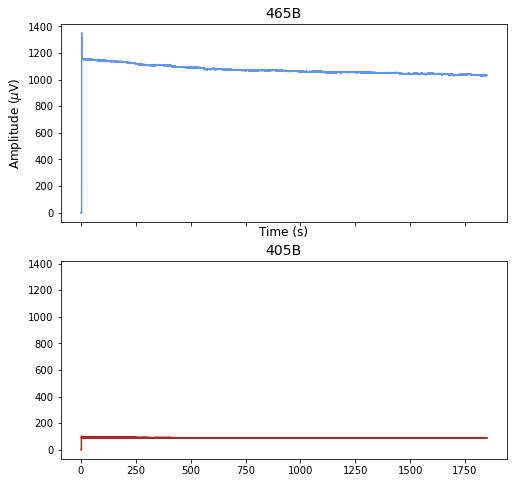

In [22]:
#Let's create time vectors for each stream store for plotting in time.
data1_time__465B = np.linspace(1, len(data1.streams._465B.data), len(data1.streams._465B.data)) / data1.streams._465B.fs
data1_time__405B = np.linspace(1, len(data1.streams._405B.data), len(data1.streams._405B.data)) / data1.streams._405B.fs
#plot the figure
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), sharex=True,sharey=True)
#first figure for 465B
ax1.plot(data1_time__465B, data1.streams._465B.data, color='cornflowerblue')
ax1.set_title('465B', fontsize=14)
#second figure for 405B
ax2.plot(data1_time__405B, data1.streams._405B.data, color='firebrick')
ax2.set_title('405B', fontsize=14)

#set axis names
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Amplitude ($\mu$V)', fontsize=12)

plt.show()

### Signal B deltaF plot

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


(0.0, 2300.0, -15.0, 20.0)

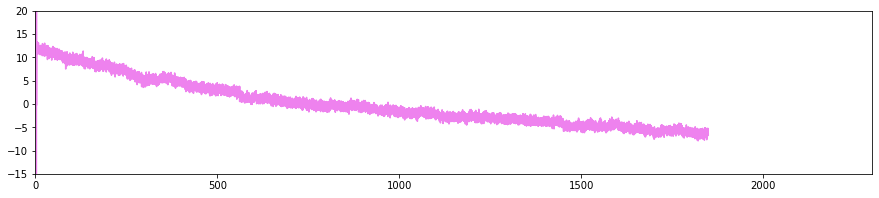

In [26]:
#Fitting 405B channel onto 465B channel to detrend signal
#Scale and fit data. Algorithm sourced from Tom Davidson 
x1= np.array(data1.streams._405B.data)
y1= np.array(data1.streams._465B.data)
bls = np.polyfit(x1, y1, 1)
fit_line = np.multiply(bls[0], x1) + bls[1]

#caculate the deltaF
x=(np.array(y1-fit_line)/np.array(fit_line))
#code for plotting and zooming in
plt.figure(figsize=(15,3))
plt.plot(np.array(data1_time__465B), np.array(x*200),color='violet')
plt.axis([0,2300,-15,20])

## Everything below is performing the same thing as above, only changed the data tank name(for example data1 --> data2)

### Algernon-200625-154539 -A 

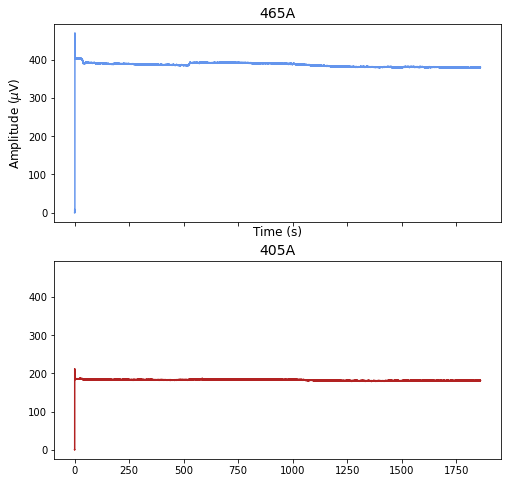

In [29]:
data2_time__465A = np.linspace(1, len(data2.streams._465A.data), len(data2.streams._465A.data)) / data2.streams._465A.fs
data2_time__405A = np.linspace(1, len(data2.streams._405A.data), len(data2.streams._405A.data)) / data2.streams._405A.fs

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), sharex=True,sharey=True)

ax1.plot(data2_time__465A, data2.streams._465A.data, color='cornflowerblue')
ax1.set_title('465A', fontsize=14)

ax2.plot(data2_time__405A, data2.streams._405A.data, color='firebrick')
ax2.set_title('405A', fontsize=14)


ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Amplitude ($\mu$V)', fontsize=12)

#plt.axis([0,2300,300,550])
plt.show()

### signalA deltaF plot

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


(0.0, 2300.0, -5.0, 5.0)

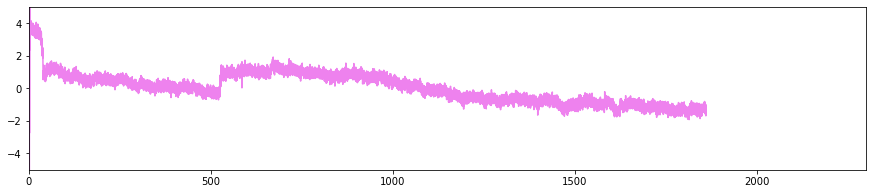

In [37]:
x1= np.array(data2.streams._405A.data)
y1= np.array(data2.streams._465A.data)
bls = np.polyfit(x1, y1, 1)
fit_line = np.multiply(bls[0], x1) + bls[1]

#caculate the deltaF
x=(np.array(y1-fit_line)/np.array(fit_line))

plt.figure(figsize=(15,3))
plt.plot(np.array(data2_time__465A), np.array(x*100),color='violet')
plt.axis([0,2300,-5,5])

### Algernon-200625-154539 -B - WHITE NOISE

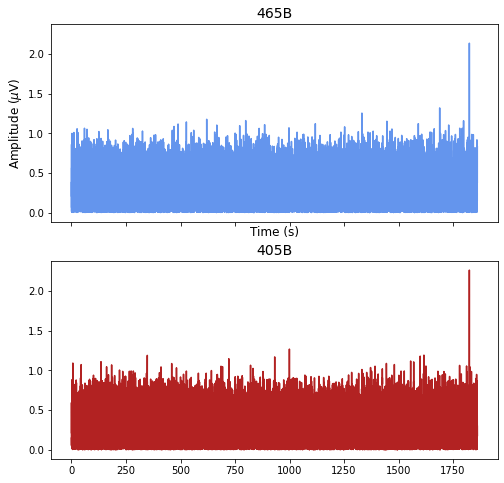

In [38]:
data2_time__465B = np.linspace(1, len(data2.streams._465B.data), len(data2.streams._465B.data)) / data2.streams._465B.fs
data2_time__405B = np.linspace(1, len(data2.streams._405B.data), len(data2.streams._405B.data)) / data2.streams._405B.fs

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), sharex=True,sharey=True)

ax1.plot(data2_time__465B, data2.streams._465B.data, color='cornflowerblue')
ax1.set_title('465B', fontsize=14)

ax2.plot(data2_time__405B, data2.streams._405B.data, color='firebrick')
ax2.set_title('405B', fontsize=14)


ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Amplitude ($\mu$V)', fontsize=12)

#plt.axis([0,2300,300,550])
plt.show()

### Algernon-200625-162128 - A

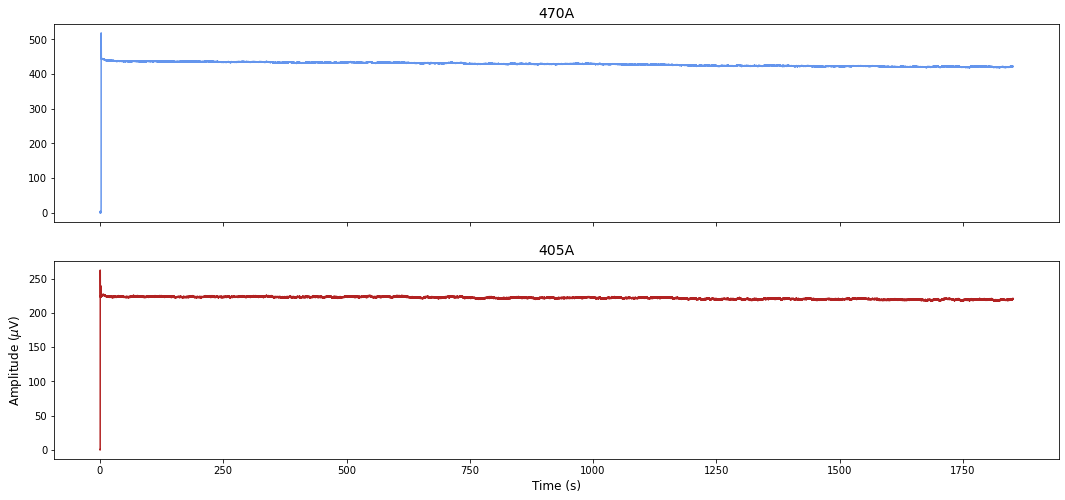

In [41]:
data3_time__465A = np.linspace(1, len(data3.streams._465A.data), len(data3.streams._465A.data)) / data3.streams._465A.fs
data3_time__405A = np.linspace(1, len(data3.streams._405A.data), len(data3.streams._405A.data)) / data3.streams._405A.fs

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 8), sharex=True)

ax1.plot(data3_time__465A, data3.streams._465A.data, color='cornflowerblue')
ax1.set_title('465A', fontsize=14)

ax2.plot(data3_time__405A, data3.streams._405A.data, color='firebrick')
ax2.set_title('405A', fontsize=14)


ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Amplitude ($\mu$V)', fontsize=12)

#ax1.set_ylim(470,550)
#plt.axis([0,300,470,550])
plt.show()

### DeltaF plot for A Channel

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


(0.0, 2300.0, -5.0, 5.0)

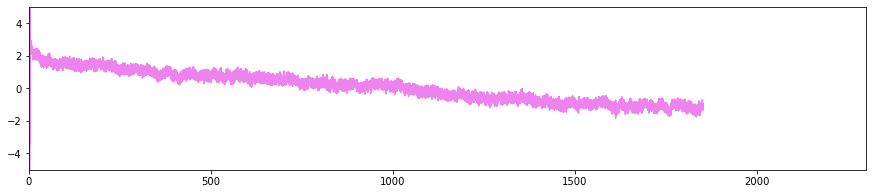

In [42]:
x1= np.array(data3.streams._405A.data)
y1= np.array(data3.streams._465A.data)

bls = np.polyfit(x1, y1, 1)
fit_line = np.multiply(bls[0], x1) + bls[1]


x=(np.array(y1-fit_line)/np.array(fit_line))

plt.figure(figsize=(15,3))
plt.plot(np.array(data3_time__465A), np.array(x*100),color='violet')
plt.axis([0,2300,-5,5])

### Algernon-200625-162128 -B

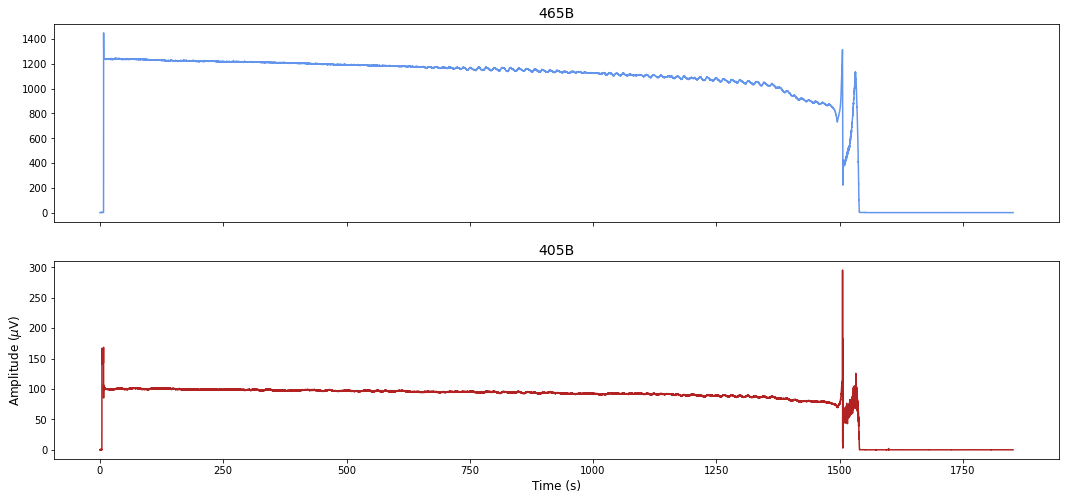

In [43]:
data3_time__465B = np.linspace(1, len(data3.streams._465B.data), len(data3.streams._465B.data)) / data3.streams._465B.fs
data3_time__405B = np.linspace(1, len(data3.streams._405B.data), len(data3.streams._405B.data)) / data3.streams._405B.fs

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 8), sharex=True)

ax1.plot(data3_time__465B, data3.streams._465B.data, color='cornflowerblue')
ax1.set_title('465B', fontsize=14)

ax2.plot(data3_time__405B, data3.streams._405B.data, color='firebrick')
ax2.set_title('405B', fontsize=14)


ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Amplitude ($\mu$V)', fontsize=12)

#ax1.set_ylim(470,550)
#plt.axis([0,300,470,550])
plt.show()

### DeltaF - B

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


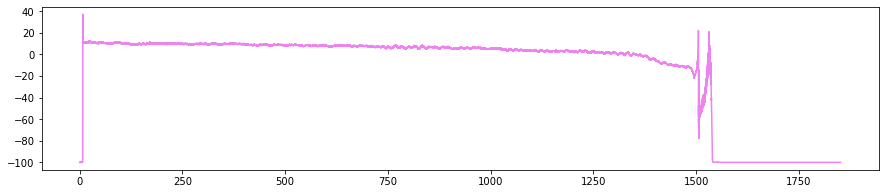

In [46]:
# Y_dF_all = []
x1= np.array(data3.streams._405B.data)
y1= np.array(data3.streams._465B.data)

bls = np.polyfit(x1, y1, 1)
fit_line = np.multiply(bls[0], x1) + bls[1]


x=(np.array(y1-fit_line)/np.array(fit_line))

plt.figure(figsize=(15,3))
plt.plot(np.array(data3_time__465B), np.array(x*100),color='violet')


### Algernon-200625-165959 -A

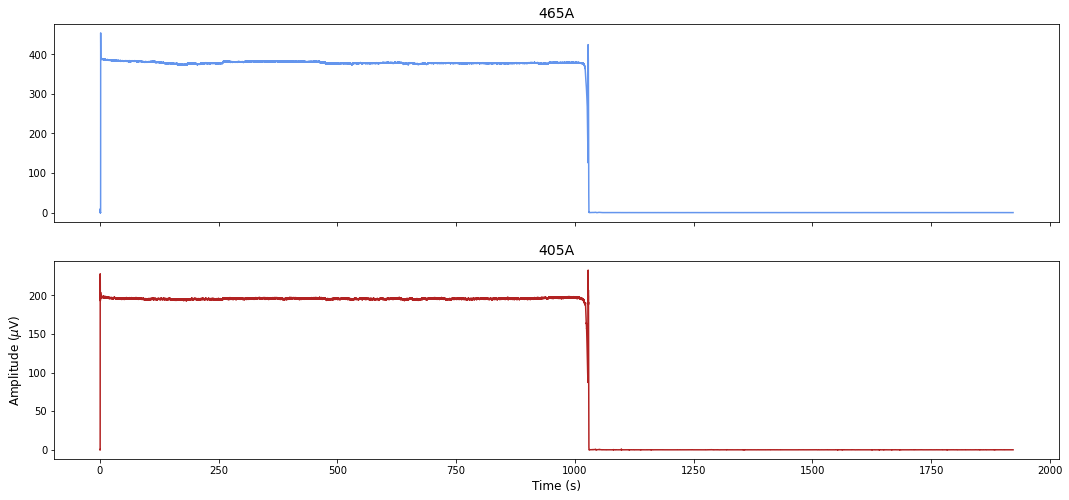

In [47]:
data4_time__465A = np.linspace(1, len(data4.streams._465A.data), len(data4.streams._465A.data)) / data4.streams._465A.fs
data4_time__405A = np.linspace(1, len(data4.streams._405A.data), len(data4.streams._405A.data)) / data4.streams._405A.fs

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 8), sharex=True)

ax1.plot(data4_time__465A, data4.streams._465A.data, color='cornflowerblue')
ax1.set_title('465A', fontsize=14)

ax2.plot(data4_time__405A, data4.streams._405A.data, color='firebrick')
ax2.set_title('405A', fontsize=14)


ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Amplitude ($\mu$V)', fontsize=12)

#ax1.set_ylim(470,550)
#plt.axis([0,300,470,550])
plt.show()

### DeltaF - A

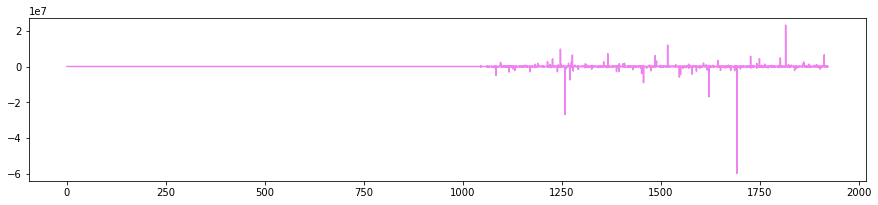

In [49]:
# Y_dF_all = []
x1= np.array(data4.streams._405A.data)
y1= np.array(data4.streams._465A.data)

bls = np.polyfit(x1, y1, 1)
fit_line = np.multiply(bls[0], x1) + bls[1]


x=(np.array(y1-fit_line)/np.array(fit_line))

plt.figure(figsize=(15,3))
plt.plot(np.array(data4_time__465A), np.array(x*100),color='violet')

### Algernon-200625-165959 -B -WHITE NOISE

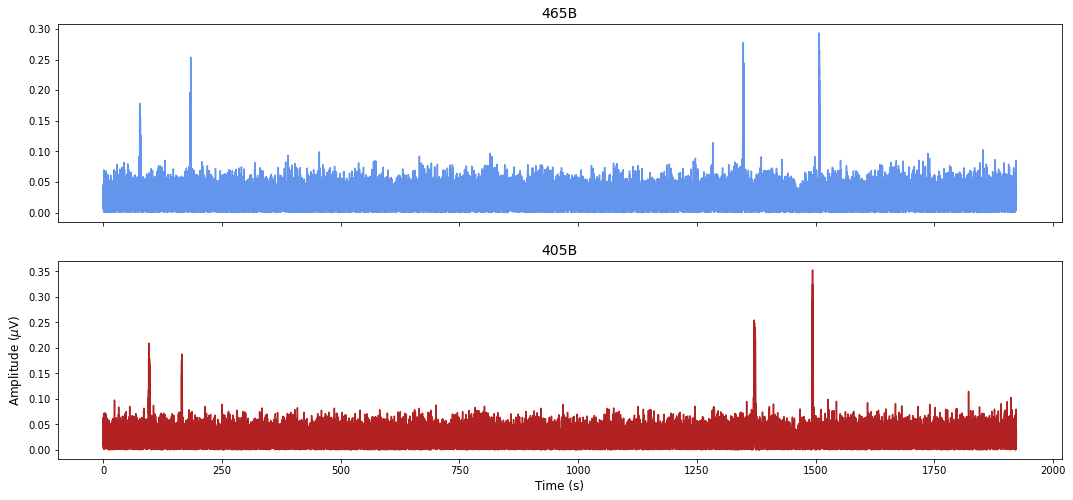

In [51]:
data4_time__465B = np.linspace(1, len(data4.streams._465B.data), len(data4.streams._465B.data)) / data4.streams._465B.fs
data4_time__405B = np.linspace(1, len(data4.streams._405B.data), len(data4.streams._405B.data)) / data4.streams._405B.fs

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 8), sharex=True)

ax1.plot(data4_time__465B, data4.streams._465B.data, color='cornflowerblue')
ax1.set_title('465B', fontsize=14)

ax2.plot(data4_time__405B, data4.streams._405B.data, color='firebrick')
ax2.set_title('405B', fontsize=14)


ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Amplitude ($\mu$V)', fontsize=12)

#ax1.set_ylim(470,550)
#plt.axis([0,300,470,550])
plt.show()

### Algernon-200810-151843 -A

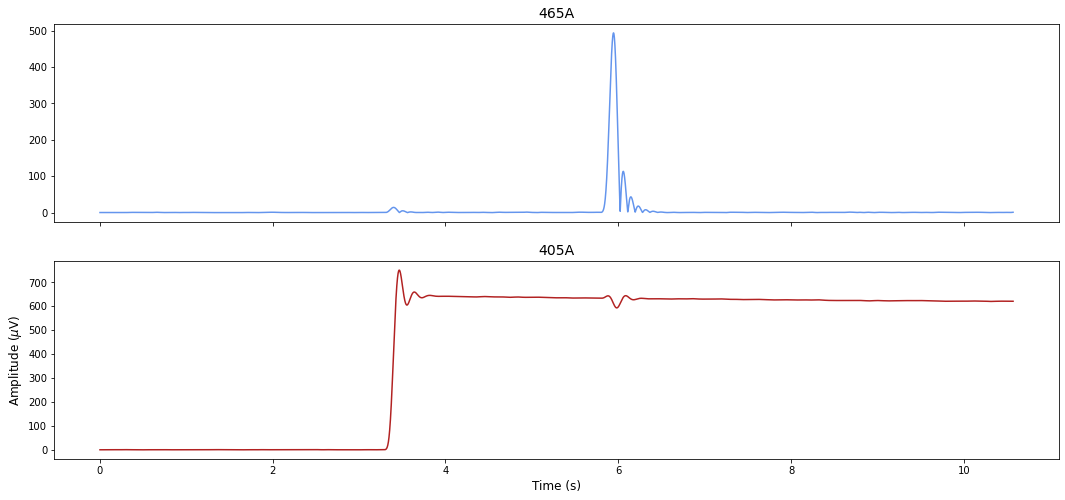

In [52]:
data5_time__465A = np.linspace(1, len(data5.streams._465A.data), len(data5.streams._465A.data)) / data5.streams._465A.fs
data5_time__405A = np.linspace(1, len(data5.streams._405A.data), len(data5.streams._405A.data)) / data5.streams._405A.fs

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 8), sharex=True)

ax1.plot(data5_time__465A, data5.streams._465A.data, color='cornflowerblue')
ax1.set_title('465A', fontsize=14)

ax2.plot(data5_time__405A, data5.streams._405A.data, color='firebrick')
ax2.set_title('405A', fontsize=14)


ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Amplitude ($\mu$V)', fontsize=12)

#ax1.set_ylim(470,550)
#plt.axis([0,300,470,550])
plt.show()

### DeltaF - A

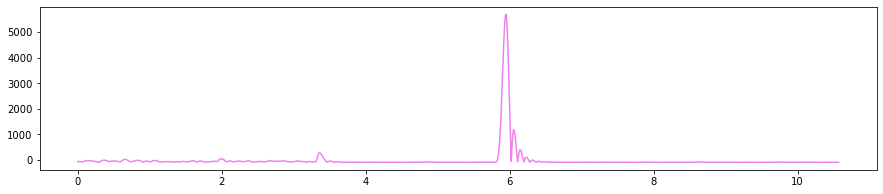

In [53]:
x1= np.array(data5.streams._405A.data)
y1= np.array(data5.streams._465A.data)

bls = np.polyfit(x1, y1, 1)
fit_line = np.multiply(bls[0], x1) + bls[1]


x=(np.array(y1-fit_line)/np.array(fit_line))

plt.figure(figsize=(15,3))
plt.plot(np.array(data5_time__465A), np.array(x*100),color='violet')

### Algernon-200810-151843 -B

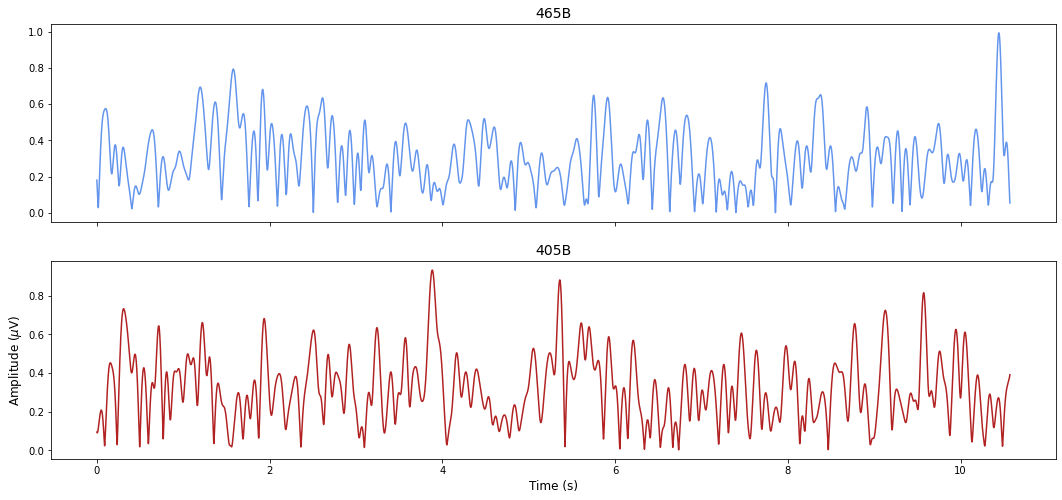

In [61]:
data5_time__465B = np.linspace(1, len(data5.streams._465B.data), len(data5.streams._465B.data)) / data5.streams._465B.fs
data5_time__405B = np.linspace(1, len(data5.streams._405B.data), len(data5.streams._405B.data)) / data5.streams._405B.fs

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 8), sharex=True)

ax1.plot(data5_time__465B, data5.streams._465B.data, color='cornflowerblue')
ax1.set_title('465B', fontsize=14)

ax2.plot(data5_time__405B, data5.streams._405B.data, color='firebrick')
ax2.set_title('405B', fontsize=14)


ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Amplitude ($\mu$V)', fontsize=12)

#ax1.set_ylim(470,550)
#plt.axis([0,300,470,550])
plt.show()

### DeltaF - B

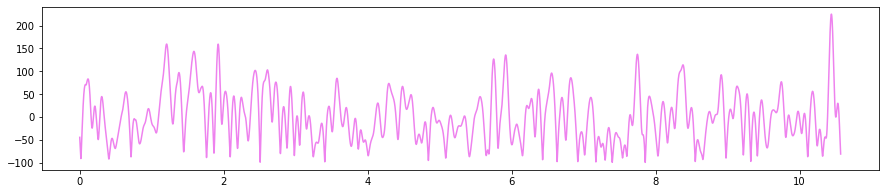

In [57]:
# Y_dF_all = []
x1= np.array(data5.streams._405B.data)
y1= np.array(data5.streams._465B.data)

bls = np.polyfit(x1, y1, 1)
fit_line = np.multiply(bls[0], x1) + bls[1]


x=(np.array(y1-fit_line)/np.array(fit_line))

plt.figure(figsize=(15,3))
plt.plot(np.array(data5_time__465B), np.array(x*100),color='violet')

### Algernon-200810-151923 -A

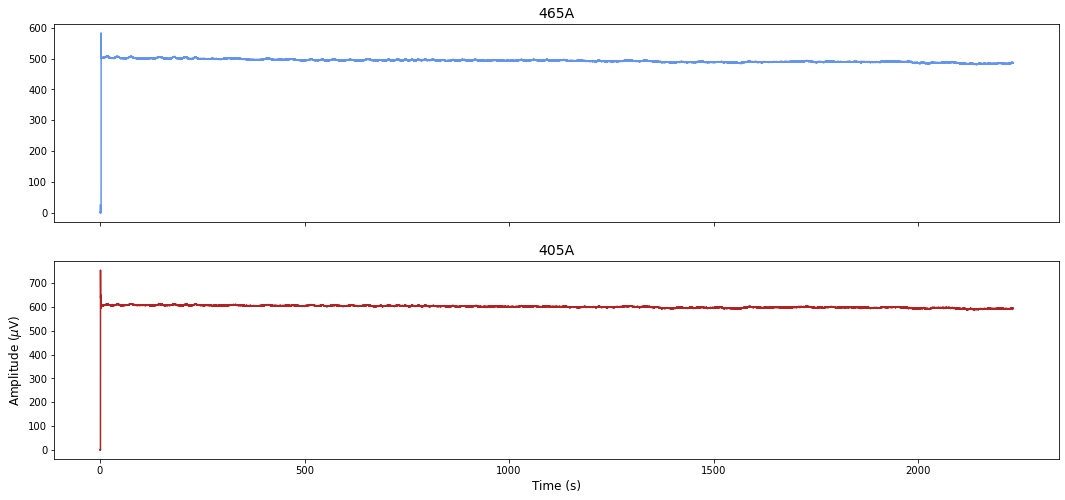

In [58]:
data6_time__465A = np.linspace(1, len(data6.streams._465A.data), len(data6.streams._465A.data)) / data6.streams._465A.fs
data6_time__405A = np.linspace(1, len(data6.streams._405A.data), len(data6.streams._405A.data)) / data6.streams._405A.fs

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 8), sharex=True)

ax1.plot(data6_time__465A, data6.streams._465A.data, color='cornflowerblue')
ax1.set_title('465A', fontsize=14)

ax2.plot(data6_time__405A, data6.streams._405A.data, color='firebrick')
ax2.set_title('405A', fontsize=14)


ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Amplitude ($\mu$V)', fontsize=12)

#ax1.set_ylim(470,550)
#plt.axis([0,300,470,550])
plt.show()

### DeltaF -A

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


(0.0, 2300.0, -5.0, 5.0)

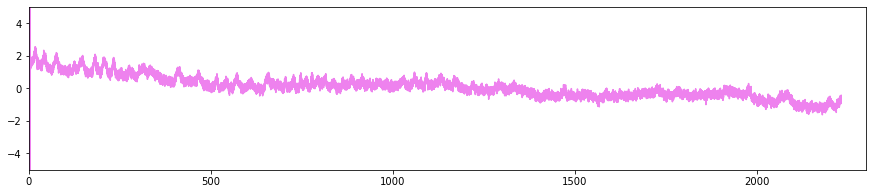

In [60]:
# Y_dF_all = []
x1= np.array(data6.streams._405A.data)
y1= np.array(data6.streams._465A.data)

bls = np.polyfit(x1, y1, 1)
fit_line = np.multiply(bls[0], x1) + bls[1]


x=(np.array(y1-fit_line)/np.array(fit_line))

plt.figure(figsize=(15,3))
plt.plot(np.array(data6_time__465A), np.array(x*100),color='violet')
plt.axis([0,2300,-5,5])

### Algernon-200810-151923 -B

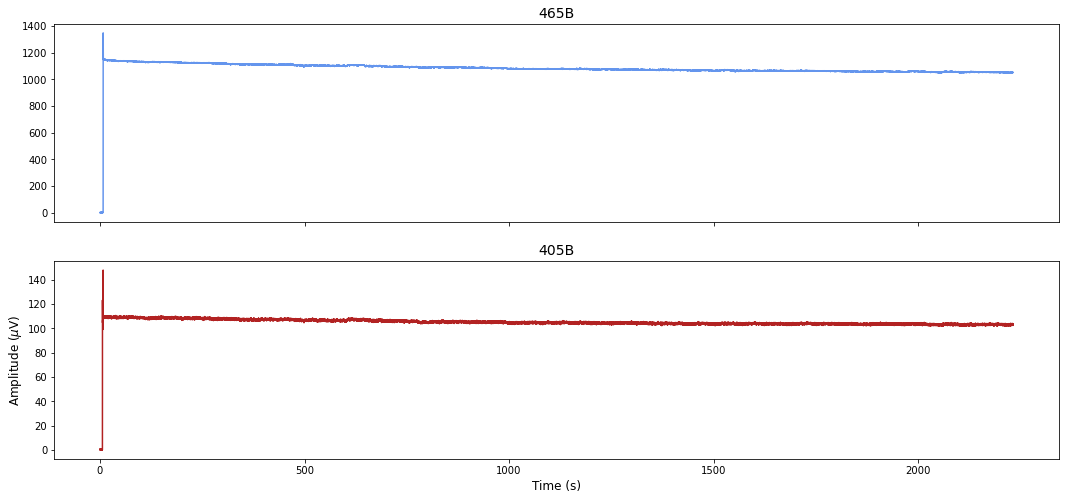

In [62]:
data6_time__465B = np.linspace(1, len(data6.streams._465B.data), len(data6.streams._465B.data)) / data6.streams._465B.fs
data6_time__405B = np.linspace(1, len(data6.streams._405B.data), len(data6.streams._405B.data)) / data6.streams._405B.fs

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 8), sharex=True)

ax1.plot(data6_time__465B, data6.streams._465B.data, color='cornflowerblue')
ax1.set_title('465B', fontsize=14)

ax2.plot(data6_time__405B, data6.streams._405B.data, color='firebrick')
ax2.set_title('405B', fontsize=14)


ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Amplitude ($\mu$V)', fontsize=12)

#ax1.set_ylim(470,550)
#plt.axis([0,300,470,550])
plt.show()

### DeltaF - B

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


(0.0, 2300.0, -5.0, 5.0)

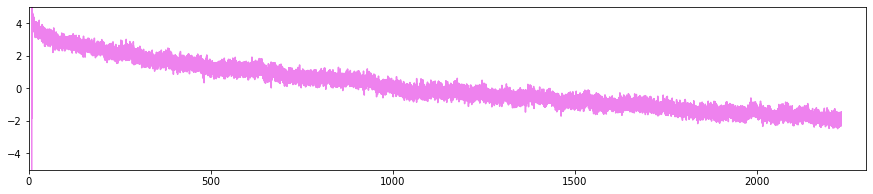

In [63]:
# Y_dF_all = []
x1= np.array(data6.streams._405B.data)
y1= np.array(data6.streams._465B.data)

bls = np.polyfit(x1, y1, 1)
fit_line = np.multiply(bls[0], x1) + bls[1]


x=(np.array(y1-fit_line)/np.array(fit_line))

plt.figure(figsize=(15,3))
plt.plot(np.array(data6_time__465B), np.array(x*100),color='violet')
plt.axis([0,2300,-5,5])

### Algernon-200810-160610 -A

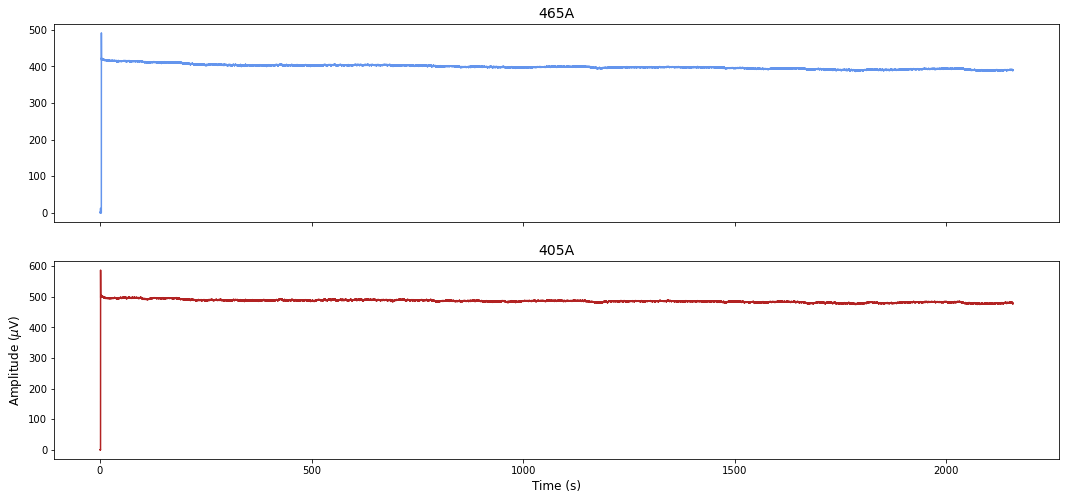

In [64]:
data7_time__465A = np.linspace(1, len(data7.streams._465A.data), len(data7.streams._465A.data)) / data7.streams._465A.fs
data7_time__405A = np.linspace(1, len(data7.streams._405A.data), len(data7.streams._405A.data)) / data7.streams._405A.fs

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 8), sharex=True)

ax1.plot(data7_time__465A, data7.streams._465A.data, color='cornflowerblue')
ax1.set_title('465A', fontsize=14)

ax2.plot(data7_time__405A, data7.streams._405A.data, color='firebrick')
ax2.set_title('405A', fontsize=14)


ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Amplitude ($\mu$V)', fontsize=12)

#ax1.set_ylim(470,550)
#plt.axis([0,300,470,550])
plt.show()

### DeltaF -A

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


(0.0, 2300.0, -5.0, 5.0)

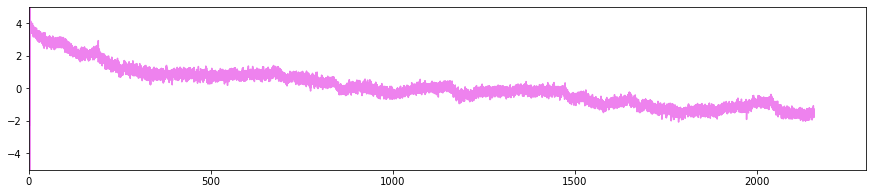

In [65]:
# Y_dF_all = []
x1= np.array(data7.streams._405A.data)
y1= np.array(data7.streams._465A.data)

bls = np.polyfit(x1, y1, 1)
fit_line = np.multiply(bls[0], x1) + bls[1]


x=(np.array(y1-fit_line)/np.array(fit_line))

plt.figure(figsize=(15,3))
plt.plot(np.array(data7_time__465A), np.array(x*100),color='violet')
plt.axis([0,2300,-5,5])

### Algernon-200810-160610 -B

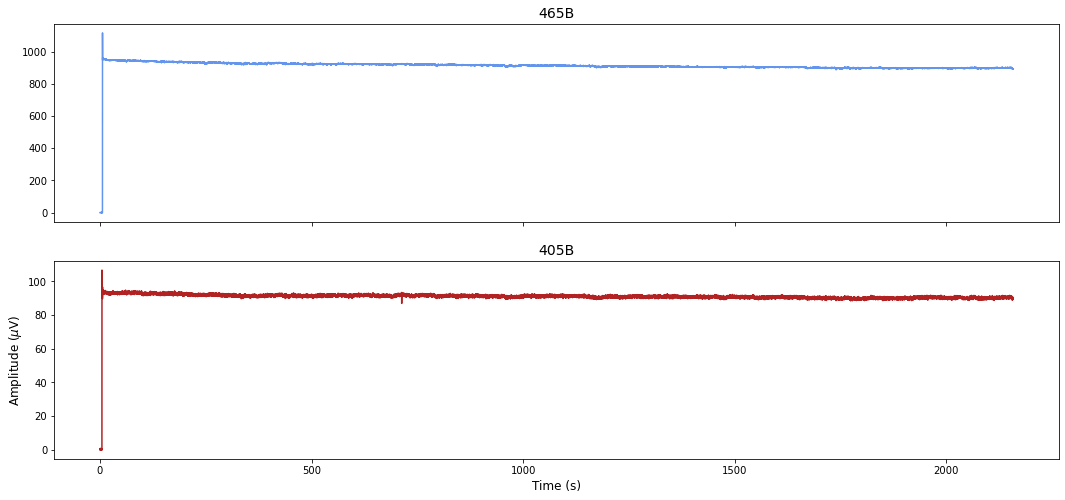

In [66]:
data7_time__465B = np.linspace(1, len(data7.streams._465B.data), len(data7.streams._465B.data)) / data7.streams._465B.fs
data7_time__405B = np.linspace(1, len(data7.streams._405B.data), len(data7.streams._405B.data)) / data7.streams._405B.fs

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 8), sharex=True)

ax1.plot(data7_time__465B, data7.streams._465B.data, color='cornflowerblue')
ax1.set_title('465B', fontsize=14)

ax2.plot(data7_time__405B, data7.streams._405B.data, color='firebrick')
ax2.set_title('405B', fontsize=14)


ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Amplitude ($\mu$V)', fontsize=12)

#ax1.set_ylim(470,550)
#plt.axis([0,300,470,550])
plt.show()

### DeltaF B

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


(0.0, 2300.0, -5.0, 5.0)

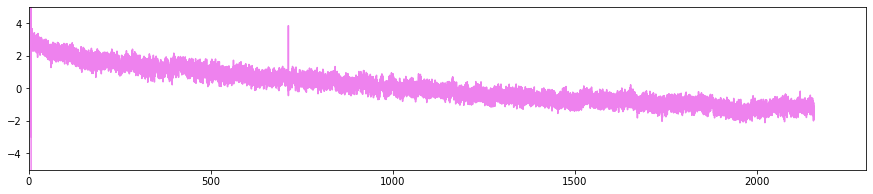

In [67]:
# Y_dF_all = []
x1= np.array(data7.streams._405B.data)
y1= np.array(data7.streams._465B.data)

bls = np.polyfit(x1, y1, 1)
fit_line = np.multiply(bls[0], x1) + bls[1]


x=(np.array(y1-fit_line)/np.array(fit_line))

plt.figure(figsize=(15,3))
plt.plot(np.array(data7_time__465B), np.array(x*100),color='violet')
plt.axis([0,2300,-5,5])